# **1. Perkenalan Dataset**


Dataset yang digunakan dalam analisis ini adalah **Medical Learning Resources**, yang berisi informasi tentang berbagai sumber daya pembelajaran medis yang tersedia secara daring. Dataset ini diperoleh dari repositori publik **Kaggle**, tepatnya dari koleksi yang dibuat oleh Gopikrishnan (2023). Dataset ini relevan untuk memahami karakteristik sumber daya pendidikan medis, seperti format, jenis, durasi, topik, organisasi pembuat, dan audiens yang dituju, yang dapat mendukung strategi pemasaran pendidikan atau pengembangan konten pembelajaran.

### Sumber Dataset
- **Sumber**: Kaggle ([Medical Learning Resources](https://www.kaggle.com/datasets/gopikrishnan2005/medical-learning-resources?select=Learning_Resources_Database_Cleaned.csv)).
- **Pembuat**: Gopikrishnan.
- **Lisensi**: Data tersedia untuk penggunaan publik di Kaggle, cocok untuk analisis dan penelitian.

### Deskripsi Dataset
Dataset ini mencakup **488 baris** data yang merepresentasikan sumber daya pembelajaran medis, seperti webinar, video YouTube, tutorial, dan halaman web. Setiap baris berisi informasi tentang sumber daya, termasuk nama, URL, deskripsi, format, jenis, durasi, topik, organisasi pembuat, audiens, serta metadata seperti status pengarsipan dan tanggal revisi. Dataset ini berguna untuk menganalisis tren format pembelajaran, preferensi audiens, atau popularitas topik medis tertentu, seperti Medical Subject Headings (MeSH), PubMed, atau genetika.

### Struktur Dataset
Dataset terdiri dari **13 kolom** dengan deskripsi sebagai berikut:
- **resource_id**: ID unik untuk setiap sumber daya (teks).
- **resource_name**: Nama sumber daya, seperti judul webinar atau tutorial (teks).
- **resource_url**: Tautan ke sumber daya (teks).
- **description**: Deskripsi singkat tentang konten sumber daya (teks).
- **archived**: Status apakah sumber daya diarsipkan (True/False, boolean).
- **format**: Format sumber daya, misalnya MP4 Video, HTML, PDF (teks).
- **type**: Jenis sumber daya, seperti Webinar, YouTube Video, Tutorial (teks).
- **runtime**: Durasi sumber daya dalam menit (numerik, ada nilai kosong).
- **subject_areas**: Topik yang dibahas, seperti MeSH, PubMed, Genetika (teks, dipisahkan tanda titik koma).
- **authoring_organization**: Organisasi yang membuat sumber daya, misalnya Training Team NCBI (teks).
- **intended_audiences**: Audiens target, seperti Everyone, Educator, Developer (teks, dipisahkan tanda titik koma).
- **record_modified**: Tanggal terakhir modifikasi metadata (teks, format tanggal).
- **resource_revised**: Tanggal revisi sumber daya (teks, format tanggal).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

### Melihat Dataset

In [ ]:
df = pd.read_csv("Learning_Resources.csv")
df.head()

,resource_id,resource_name,resource_url,description,archived,format,type,runtime,subject_areas,authoring_organization,intended_audiences,record_modified,resource_revised
0,L00691080,2018 MeSH Highlights,https://www.nlm.nih.gov/bsd/disted/clinics/mes...,"On January 5, 2018, NLM staff provided a highl...",False,MP4 Video,Webinar,21.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer,12/11/2023 12:00:00 AM,01/12/2018 12:00:00 AM
1,L000854112,2019 MeSH Highlights,https://www.nlm.nih.gov/bsd/disted/clinics/mes...,"On January 4, 2019, NLM staff provided a highl...",False,MP4 Video,Webinar,30.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer,06/16/2020 12:00:00 AM,06/16/2020 12:00:00 AM
2,L001321112,2020 MeSH Highlights,https://www.nlm.nih.gov/oet/ed/mesh/2020_mesh_...,"On January 10, 2020, Sarah Helson from the Nat...",False,MP4 Video,Webinar,46.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer,01/25/2021 12:00:00 AM,03/27/2020 12:00:00 AM
3,L001961112,2021 MeSH Highlights,https://www.nlm.nih.gov/oet/ed/mesh/2021_mesh_...,"Every year, updates are made to MeSH, the NLM ...",False,MP4 Video,Webinar,53.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer,01/18/2023 12:00:00 AM,02/17/2021 12:00:00 AM
4,L002741112,2022 MeSH Highlights,https://www.nlm.nih.gov/oet/ed/mesh/2022_mesh_...,"On January 12, 2022, Louise To and a panel of ...",False,MP4 Video,Webinar,53.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer,12/06/2023 12:00:00 AM,02/03/2022 12:00:00 AM


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Melihat informasi umum pada data dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   resource_id             617 non-null    object
 1   resource_name           617 non-null    object
 2   resource_url            617 non-null    object
 3   description             617 non-null    object
 4   archived                617 non-null    bool  
 5   format                  617 non-null    object
 6   type                    617 non-null    object
 7   runtime                 617 non-null    object
 8   subject_areas           617 non-null    object
 9   authoring_organization  617 non-null    object
 10  intended_audiences      617 non-null    object
 11  record_modified         617 non-null    object
 12  resource_revised        617 non-null    object
dtypes: bool(1), object(12)
memory usage: 58.6+ KB


### Melihat panjang dan lebar data

In [4]:
df.shape

(617, 13)

### Melihat deskripsi dari data

In [5]:
df.describe()

,resource_id,resource_name,resource_url,description,archived,format,type,runtime,subject_areas,authoring_organization,intended_audiences,record_modified,resource_revised
count,617,617,617,617,617,617,617,617,617,617,617,617,617
unique,617,599,617,589,1,6,15,107,144,16,7,184,361
top,L004282112,Getting Started with NCBI Data in Python,https://www.nlm.nih.gov/exhibition/shakespeare...,The amount of biomolecular structure data prod...,False,MP4 Video,YouTube Video,Unknown,Genetics and Molecular Biology; Bioinformatics,"Training Team, User Engagement Program",Everyone; Educator,03/14/2025 12:00:00 AM,01/24/2024 12:00:00 AM
freq,1,2,1,3,617,340,252,185,61,210,260,51,28


### Memeriksa Data yang Bernilai Null

In [6]:
df.isnull().sum()

resource_id               0
resource_name             0
resource_url              0
description               0
archived                  0
format                    0
type                      0
runtime                   0
subject_areas             0
authoring_organization    0
intended_audiences        0
record_modified           0
resource_revised          0
dtype: int64

Hasilnya data tidak ada yang 'Null Values'

### Memeriksa Data yang Berduplikat

In [7]:
df.duplicated().sum()

np.int64(0)

Hasilnya data tidak ada yang data yang duplikat

### Mencari Nilai Unik dari Data

In [8]:
df.nunique()

resource_id               617
resource_name             599
resource_url              617
description               589
archived                    1
format                      6
type                       15
runtime                   107
subject_areas             144
authoring_organization     16
intended_audiences          7
record_modified           184
resource_revised          361
dtype: int64

### Menunjukkan frekuensi (jumlah kemunculan) dari setiap nilai unik yang terdapat dalam kolom 'format'.

In [9]:
df['format'].value_counts()

format
MP4 Video     340
HTML          222
PDF            23
ZIP            21
MS Word         6
PowerPoint      5
Name: count, dtype: int64

### Menunjukkan frekuensi (jumlah kemunculan) dari setiap nilai unik yang terdapat dalam kolom 'runtime'.

In [10]:
df['runtime'].value_counts()

runtime
Unknown    185
2.0         42
60.0        34
3.0         31
4.0         26
          ... 
94.0         1
91.0         1
25.0         1
32.0         1
127.0        1
Name: count, Length: 107, dtype: int64

### Menunjukkan frekuensi (jumlah kemunculan) dari setiap nilai unik yang terdapat dalam kolom 'subject_areas'.

In [11]:
df['subject_areas'].value_counts(5)

subject_areas
Genetics and Molecular Biology; Bioinformatics                           0.098865
PubMed                                                                   0.090762
Genetics and Molecular Biology                                           0.087520
ClinicalTrials.gov                                                       0.050243
K-12 Education; History of Medicine                                      0.040519
                                                                           ...   
Health Services Research; Data Management; Common Data Elements (CDE)    0.001621
Genetics and Molecular Biology; Data Science                             0.001621
My NCBI; NIH Manuscript System                                           0.001621
Drugs and Chemicals; PubMed; Clinical Medicine; Nursing; Bookshelf       0.001621
Genetics and Molecular Biology; Developmental Biology; Immunology        0.001621
Name: proportion, Length: 144, dtype: float64

### Menunjukkan frekuensi (jumlah kemunculan) dari setiap nilai unik yang terdapat dalam kolom 'authoring_organization'.

In [12]:
df['authoring_organization'].value_counts()

authoring_organization
Training Team, User Engagement Program         210
Training Team, NCBI                            158
Network of the National Library of Medicine    116
Exhibitions Team                                43
ClinicalTrials.gov Team, NCBI                   24
Terminology Services                            19
Other NIH                                       11
Office of Communications and Public Liaison     10
PubMed Central Team, NCBI                        9
MedlinePlus Team                                 7
Metadata Management Program                      2
NIHMS Team, NCBI                                 2
External Organization                            2
NLM Intramural Research Division                 2
Bookshelf Team, NCBI                             1
Common Data Element Repository Team              1
Name: count, dtype: int64

### Menunjukkan frekuensi (jumlah kemunculan) dari setiap nilai unik yang terdapat dalam kolom 'intended_audiences'.

In [13]:
df['intended_audiences'].value_counts()

intended_audiences
Everyone; Educator               260
Everyone                         251
Educator                          45
Everyone; Educator; Developer     31
Educator; Developer               20
Everyone; Developer                8
Developer                          2
Name: count, dtype: int64

### Mengidentifikasi fitur dalam DataFrame df yang hampir konstan atau didominasi oleh satu nilai tertentu.

In [14]:
print("IDENTIFY CONSTANT FEATURES :")
for col in df:
  top_pct = df[col].value_counts(normalize=True).max()
  if top_pct > 0.95:
    print(f"{col} {top_pct:.2%}")

IDENTIFY CONSTANT FEATURES :
archived 100.00%


### Visualisasi distribusi

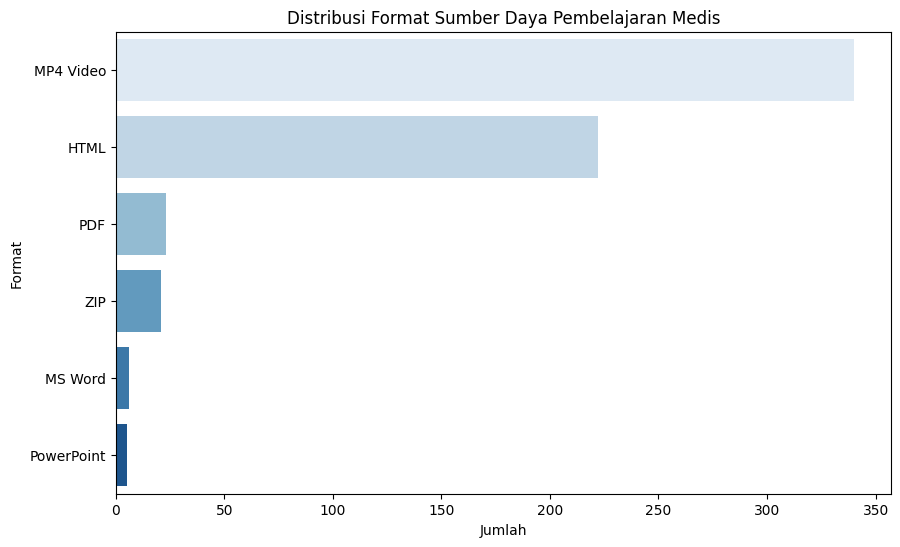

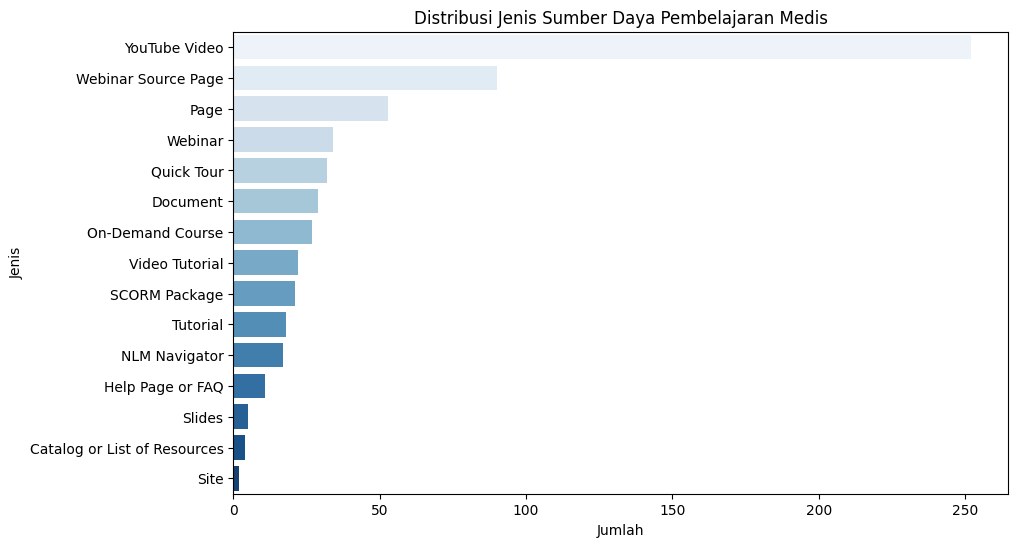

In [15]:
# Visualisasi distribusi format sumber daya
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='format', order=df['format'].value_counts().index, palette='Blues')
plt.title('Distribusi Format Sumber Daya Pembelajaran Medis')
plt.xlabel('Jumlah')
plt.ylabel('Format')
plt.show()

# Visualisasi distribusi jenis sumber daya
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette='Blues')
plt.title('Distribusi Jenis Sumber Daya Pembelajaran Medis')
plt.xlabel('Jumlah')
plt.ylabel('Jenis')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Menghapus fitur tertentu dari dataset

In [16]:
print ('DELETED CONSTANT FEATURES....')
df.drop(["archived", "record_modified", "resource_revised"], axis=1, inplace=True)

DELETED CONSTANT FEATURES....


### Melihat DataFrame

In [17]:
df.head()

,resource_id,resource_name,resource_url,description,format,type,runtime,subject_areas,authoring_organization,intended_audiences
0,L00691080,2018 MeSH Highlights,https://www.nlm.nih.gov/bsd/disted/clinics/mes...,"On January 5, 2018, NLM staff provided a highl...",MP4 Video,Webinar,21.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer
1,L000854112,2019 MeSH Highlights,https://www.nlm.nih.gov/bsd/disted/clinics/mes...,"On January 4, 2019, NLM staff provided a highl...",MP4 Video,Webinar,30.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer
2,L001321112,2020 MeSH Highlights,https://www.nlm.nih.gov/oet/ed/mesh/2020_mesh_...,"On January 10, 2020, Sarah Helson from the Nat...",MP4 Video,Webinar,46.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer
3,L001961112,2021 MeSH Highlights,https://www.nlm.nih.gov/oet/ed/mesh/2021_mesh_...,"Every year, updates are made to MeSH, the NLM ...",MP4 Video,Webinar,53.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer
4,L002741112,2022 MeSH Highlights,https://www.nlm.nih.gov/oet/ed/mesh/2022_mesh_...,"On January 12, 2022, Louise To and a panel of ...",MP4 Video,Webinar,53.0,Medical Subject Headings (MeSH); PubMed,"Training Team, User Engagement Program",Everyone; Educator; Developer


### Mengisi semua nilai yang kosong (NaN atau NaT) dalam DataFrame Pandas df dengan string kosong ('') secara langsung pada DataFrame tersebut.

In [18]:
df.fillna('', inplace=True)

### Membersihkan dan menstandarisasi satu teks input melalui beberapa tahap, seperti menghilangkan karakter spesial, normalisasi spasi, dan mengubah teks menjadi huruf kecil, untuk mempersiapkannya untuk pemrosesan lebih lanjut.

In [19]:
def preprocess_individual_text(text_input):
    # Pastikan input adalah string
    text = str(text_input)

    # Hapus semua karakter spesial (ganti non-alphanumeric dengan spasi)
    processed_text = re.sub(r'\W', ' ', text)

    # Hapus semua karakter tunggal yang diapit spasi
    processed_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_text)

    # Hapus karakter tunggal dari awal string (jika diikuti spasi)
    # Regex diperbaiki: r'^[a-zA-Z]\s+' (tanpa '\' sebelum '^')
    processed_text = re.sub(r'^[a-zA-Z]\s+', ' ', processed_text)

    # Ganti spasi ganda (atau lebih) dengan spasi tunggal
    processed_text = re.sub(r'\s+', ' ', processed_text, flags=re.I)

    # Hapus prefix 'b ' (biasanya dari representasi byte string seperti b'text')
    processed_text = re.sub(r'^b\s+', '', processed_text)

    # Ubah ke huruf kecil
    processed_text = processed_text.lower()

    # Hapus spasi di awal dan akhir
    processed_text = processed_text.strip()

    return processed_text

### Membersihkan dan menstandarisasi teks

In [20]:
df['resource_name'] = df['resource_name'].apply(preprocess_individual_text)
df['description'] = df['description'].apply(preprocess_individual_text)
df['intended_audiences'] = df['intended_audiences'].apply(preprocess_individual_text)
df['subject_areas'] = df['subject_areas'].apply(preprocess_individual_text)
df['type'] = df['type'].apply(preprocess_individual_text)
df['authoring_organization'] = df['authoring_organization'].apply(preprocess_individual_text)

### Menggabungkan teks dari beberapa kolom

In [21]:
def create_content_soup(x):
    subject_areas = " ".join(x["subject_areas"].replace(';',' ').split())
    intended_audiences = " ".join(x["intended_audiences"].replace(';',' ').split())

    return (x["resource_name"] + ' ' +
            x["description"]+ ' ' +
            subject_areas + ' ' +
            x["type"] + ' ' +
            intended_audiences + ' ' +
            x["authoring_organization"])

### Membuat kolom baru bernama content_soup di DataFrame df

In [22]:
df["content_soup"] = df.apply(create_content_soup, axis=1)

### Melihat data `content_soup` dari baris kedua (indeks 1) dari DataFrame

In [23]:
df['content_soup'].iloc[1]

'2019 mesh highlights on january 4 2019 nlm staff provided highlights tour of the 2019 medical subject headings mesh 20 minute presentation featured new publication types including systematic reviews three deleted subheadings and additional terminology for data neoplasms and more medical subject headings mesh pubmed webinar everyone educator developer training team user engagement program'